## 1. Optimizing Allocation of Healthcare in California

**Authors**

- Jerry Qian A14457025
- Umang Saraf

## 2. Question and Importance:

> Which areas in California do not provide convenient access to healthcare?  
> What would be the optimal placements of new hospitals to reach more residents of California with access to healthcare?


We would like to explore the dataset of hospitals and clinics against the areas of population concentration across California. Our end goal is to find whether people in California have equal and convenient access to healthcare by analyzing the quality of hospitals and distance between residents to hospitals in different territories. We plan to look at data of residents and hospitals in each zip code. 

We expect to find that not everyone in California has equal and convenient access to quality healthcare. There will likely be areas where hospitals are far from a convenient distance to residents. More importantly, residents may have access to healthcare but it may not be the best quality or fit for their needs. This brings up the importance of our analysis, to see if we can determine the exact areas of residents who are not able to access healthcare as readily as others. Especially in light of the recent Coronavirus situation, allocating convenient healthcare to citizens of California can help treat and stop the spread of the disease.

The business case for our analysis can be utilized by healthcare providers and urban designers in the government to determine how to create accessible healthcare for all. Large healthcare corporations can use this data to find out where to build their next hospital. They can also determine which existing hospitals would require an upgrade to their services.
Our audience would be the residents that are not receiving accessible and quality healthcare. They can use this data to either relocate, or support the construction of new hospitals in their area. 



## 3. Background & Literature

1. Access to Quality Care - Let's Get Healthy California - https://letsgethealthy.ca.gov/access-quality-care/  

This article pointed out to us that U.S. racial and ethnic minorities are less likely to receive routine medical procedures and more likely to experience a lower quality of health services. Also, California ranks 20th among all states for overall quality of care for low-income patients. Furthermore, even though they make up the majority of the state’s population, communities of color are less likely to receive quality mental health care services than their Caucasian peers. This key statistic directed us to explore the communities lacking conveninent healthcare and their racial demographics.

2. Healthcare Priorities and Experiences of California Residents and Provider Shortages
https://www.kff.org/report-section/the-health-care-priorities-and-experiences-of-california-residents-section-4-access-to-providers-and-provider-shortages/  

In this article, a survey states that about three-quarters (77 percent) of Californians say that “making sure there are enough doctors, nurses, and other health care providers across California” should be an important priority for the state government to address. Another 38 percent of people call it an “extremely important” priority. Continuing on in the survery, a third of California residents say their community doesn’t have enough primary care doctors (35 percent) or specialists (33 percent) to serve the needs of local residents, and about a quarter (27 percent) say it doesn’t have enough hospitals. These survey statistics confirmed our suspicions that California does not have convenient healthcare for all.

The survey also looked into racial demograhics, and states that people who are Black or Hispanic, those with lower incomes, as well as those living in the San Joaquin Valley and the Inland Empire are more likely than their counterparts to say their community lacks adequate numbers of providers.

3. New California Data Resource Highlights Need for Bold Action on Health Disparities
https://www.chcf.org/blog/new-california-data-resource-bold-action-health-disparities/

This article explains some of the reasoning behind the unfair allocation of healthcare. There is an emerging consensus on structural racism, or the effects of persistent discriminatory beliefs and historical decisions around the allocation of resources that negatively affect certain groups today. It also states that the role of implicit bias — a set of automatic and unconscious stereotypes and prejudices that affect everyone, including health care providers — must also be acknowledged. Therefore, a patient’s race, language, immigration status, or sexual orientation, may be contributing to these disparities.


4. California's Public Health System Facts and Figures - https://caph.org/memberdirectory/facts/

We also wanted some background data on California's existing hospitals. This source contains data on California’s 21 public health care systems that provide a range of comprehensive services including primary care, outpatient specialty care, emergency and inpatient services, and rehabilitative services.

Some interesting statistics I found were that these hospitals serve more than 2.85 million patients annually and operate in 15 counties where more than 80% of the state’s population lives. It also provides 40% of all hospital care to the remaining uninsured in California, as well as a diverse patient population with 35% of patients speaking a primary language other than English.



## 4. Libraries Used

Library's used

**`geopandas`**
For some spatial operation and cleaning the data 

**`pandas`**
To compute descriptive statistics and manipulate data 


**`ArcGIS`**
For spatial operations and working with spatial data 

**`matplotlib`**
To visualize our data and findings 

### Functions Used

**`use_proximity.create_buffers`**  

Used to create a 20 mile buffer around all the hospitals in california to find tracts that are within ten given buffer 

**`arcgis.overlay`**  
Used to calculate area in each tract that is not covered by the buffer created using the hospital layer 

**`arcgis.geocoding`**  

Used to add geometric locations to events in unseen locations which were missing latitude/longitude. We use this to get lat and long of locations owned by the government in california 

**`arcgis.network`**  
Used to calculate service areas around an event’s location (both baseline and historical).

**`find_centroids`** 
Used to find the centroids of census tracts to serve as demand points.

**`network.analysis.solve_location_allocation`**
Used to find optimal new locations to put new hospitals, using defined demand and candidate facilities based on distance.

**`pandas`, `datetime`, etc**  
General packages used primarily to clean our data, query our data, or to add further logic to certain operations (such as creating service areas for a specific date and time).



### Imports

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

%matplotlib inline 
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.features.manage_data import overlay_layers
from arcgis.features.analysis import *
from arcgis.features import use_proximity
import matplotlib.pyplot as plt
from arcgis.mapping import WebMap
from arcgis.widgets import MapView



In [2]:
from arcgis.geocoding import Geocoder, get_geocoders, geocode, batch_geocode
from arcgis.gis import GIS
import arcgis.network as network
from arcgis.features import FeatureLayer, Feature, FeatureSet, FeatureCollection, find_locations
import pandas as pd
import time
import datetime as dt

In [3]:
gis = GIS(username='jeq004_ucsd5')  # this will ask for password. 
arcgis.__version__

Enter password: ········


'1.7.0'

## 5. Data Sources

---
**Title**: Healthy Places Map Index Map Shapefile

**URL**: https://healthyplacesindex.org/data-reports/

**Number of records**: 8048

**Description**: The California Healthy Places Index (HPI) is developed by the Public Health Alliance of Southern California that explores local factors that predict life expectancy and compares community conditions across the state. The HPI provides overall scores and detailed data on specific policy action areas that shape health, like housing, transportation, education, air quality, income, demographics and more. This dataset gave us an overview of which census tracts have more convenient and quality healthcare. We also used its defined census tracts and data on socio-economic factors.

---

---
**Title**: State Buildings Sustainability Metrics

**URL**: https://data.ca.gov/dataset/state-buildings-sustainability-metrics

**Number of records**: 1722

**Description**: This data set lists sustainability metric data for state-owned buildings. This was the best dataset we could find to set as candidate points for our solve location allocation algorithm. There wasn't any dataset that contained locations for potential new buildings, so we thought that the next best thing would be to find locations of existing state buildings that are located within the central parts of the city. In the end, this source worked out well as its locations were close to demand points in each census tract.

---

---
**Title**: Licensed Healthcare Facility Data in California

**URL**: https://ucsdonline.maps.arcgis.com/home/item.html?id=41daac7fcfc0413badf6b9a9298acdfc

**Number of records**: 545

**Description**: The Licensed Healthcare Facilities point layer represents the locations of all healthcare facilities licensed by the State of California, Department of Health Services. Some of the facility types include hospitals, nursing homes, clinics, etc. We chose to analyze the main type of hospitals, General Acute Care Hospitals. Even though there were layers of other facilities, but since other types of clinics served different purposes, we felt that this layer of acute care hospitals should be our target of coverage analysis. 

---


In [4]:
#hpi_layer = hpi_zip.publish({"name":"HPI Index Cali"})
hpi_layer = gis.content.get('ab57051da94e4ff9af2fbbed96122d69')
hpi = hpi_layer.layers[0]


In [5]:
public_content = gis.content.get('41daac7fcfc0413badf6b9a9298acdfc')
hospital_layrer = public_content.layers[0]

## 6. Data Cleaning


This project didnt require a huge amount of cleaning as all the datasets used in this project were directly accessed from the ArcGis library. There were still some cleaning involved 

- We removed all the census tracts that had a population of 0 from our hpi_df_toClean table 


In [6]:
hpi_df_toClean = hpi.query().sdf
hpi_df_toClean.head()

,CENSUSAREA,COUNTY,CensusTrac,City,County_FIP,County_Nam,FID,GEO_ID,LEB,LEB_pctile,...,treecano_1,treecanopy,twoparen_1,twoparents,uncrowded,uncrowded_,version,voting,voting_pct,white_pct
0,0.354,059,06059032033,Mission Viejo,6059,Orange,1,1400000US06059032033,83.648327,78.788656,...,67.060182,7.113879,71.974849,84.832905,94.9,53.483896,Wed13Dec17,63.895912,35.403567,61.773874
1,0.987,059,06059032034,Mission Viejo,6059,Orange,2,1400000US06059032034,84.565595,86.231233,...,73.501861,8.323814,96.920313,96.040373,100.0,96.933145,Wed13Dec17,76.531690,76.863852,76.760685
2,0.657,059,06059032036,Mission Viejo,6059,Orange,3,1400000US06059032036,82.095211,62.107019,...,79.789555,10.106848,77.774926,86.889154,98.6,82.073656,Wed13Dec17,74.956258,71.358912,72.425629
3,1.397,059,06059032045,Coto de Caza,6059,Orange,4,1400000US06059032045,82.284957,64.301296,...,44.822276,4.693613,94.726036,94.426230,99.6,92.903888,Wed13Dec17,76.077226,75.195688,77.254237
4,0.598,059,06059032054,Rancho Santa Margarita,6059,Orange,5,1400000US06059032054,84.142300,83.036058,...,13.627615,2.990442,89.965354,91.698991,96.9,66.919030,Wed13Dec17,67.537095,45.900167,61.304431


In [7]:
null_pop = (hpi_df_toClean['pop2010'] == 0).sum()
print('number of census tracts with null population = ' + str(null_pop))

#removing all the census tracts with null population from our SEDF 
hpi_df_toClean  = hpi_df_toClean[hpi_df_toClean['pop2010'] != 0]


number of census tracts with null population = 24


In [8]:
hospitals_df = hospital_layrer.query().sdf
hospitals_df.head()

,COUNTY_CODE,COUNTY_NAME,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,ER_SERVICE_LEVEL_DESC,FACILITY_NAME,FACILITY_STATUS_DATE,FACILITY_STATUS_DESC,HYPERLINK_TO_ATLAS,LATITUDE,LICENSE_CAT_DESC,LICENSE_TYPE_DESC,LONGITUDE,OBJECTID,OSHPD_ID,SHAPE,TOTAL_NUMBER_BEDS
0,1.0,Alameda,20103 Lake Chabot Rd,Castro Valley,94546,Emergency - Basic,SUTTER EDEN MEDICAL CENTER,2012-10-31 12:00:00,Closed,http://gis.oshpd.ca.gov/atlas/places/facility/...,37.69871,General Acute Care Hospital,Hospital,-122.08753,4,106010805,"{""x"": -13590720.2129, ""y"": 4536949.933899999, ...",178.0
1,1.0,Alameda,27400 Hesperian Blvd,Hayward,94545,Emergency - Basic,KAISER FOUNDATION HOSPITAL - HAYWARD/FREMONT,2014-06-02 12:00:00,Closed,http://gis.oshpd.ca.gov/atlas/places/facility/...,37.62593,General Acute Care Hospital,Hospital,-122.09338,9,106010858,"{""x"": -13591371.432799999, ""y"": 4526715.508299...",213.0
2,1.0,Alameda,27200 Calaroga Ave,Hayward,94545,Emergency - Basic,ST. ROSE HOSPITAL,1962-10-10 12:00:00,Open,http://gis.oshpd.ca.gov/atlas/places/facility/...,37.63291,General Acute Care Hospital,Hospital,-122.08962,13,106010967,"{""x"": -13590952.8716, ""y"": 4527696.6109, ""spat...",217.0
3,1.0,Alameda,1111 E Stanley Blvd,Livermore,94550,,VALLEY MEMORIAL HOSPITAL (No ED. Suspended beds),1969-10-19 12:00:00,Open,http://gis.oshpd.ca.gov/atlas/places/facility/...,37.67870,General Acute Care Hospital,Hospital,-121.78252,14,106010983,"{""x"": -13556766.6606, ""y"": 4534135.0961000025,...",75.0
4,1.0,Alameda,2000 Mowry Ave,Fremont,94538,Emergency - Basic,WASHINGTON HOSPITAL - FREMONT,1958-11-19 12:00:00,Open,http://gis.oshpd.ca.gov/atlas/places/facility/...,37.55847,General Acute Care Hospital,Hospital,-121.98006,15,106010987,"{""x"": -13578756.710900001, ""y"": 4517238.132799...",341.0


## 7. Descriptive Statistics

Census tracts layer Stats 

- Number of Census Trcats - **8,024** 
- Mean population of each census tract **4,642**
- Median income of each census tract  - **59,573**
- Number of census Trcats with 0 population - **24**

Hospital layer stats - 

- Number of Acute care hospitals in California - **545**
- Number of beds in all hospitals - **97,622**
- County with Higest number of hospitals - **Los Angeles**



In [13]:
hpi_df_toClean.describe()

,FID,OBJECTID,CENSUSAREA,Latitude,Longitude,Shape_Leng,Shape_Area,OBJECTID_1,pop2010,pct2010gq,...,white_pct,black_pct,asian_pct,latino_pct,multiple_p,NativeAm_p,PacificIsl,other_pct,Shape__Area,Shape__Length
count,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8.024000e+03,8024.000000,8024.000000,8024.000000,...,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8.024000e+03,8024.000000
mean,4024.254487,4024.088111,19.411679,-277749.817019,57905.265341,16526.517103,5.103200e+07,4028.236167,4642.816052,2.307515,...,42.547786,5.425861,12.381083,37.227368,1.875302,0.114242,0.059973,0.006970,8.093558e+07,20625.708560
std,2323.634021,2324.452408,161.519404,231374.575471,178674.770421,38963.808690,4.218864e+08,2326.641208,1966.449353,9.574740,...,28.182441,10.001359,15.225191,27.090573,1.931438,1.438260,0.510018,0.175475,6.582555e+08,49227.754235
min,1.000000,1.000000,0.022000,-602910.034649,-359475.942312,962.577870,5.658456e+04,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.076686e+04,1219.035836
25%,2013.750000,2010.750000,0.396000,-452420.909522,-132206.403554,4589.442381,1.039178e+06,2011.750000,3362.000000,0.000000,...,16.730496,0.000000,2.446905,14.438283,0.000000,0.000000,0.000000,0.000000,1.558406e+06,5618.213432
50%,4022.500000,4022.500000,0.732000,-421706.458346,144664.412499,6424.294495,1.911837e+06,4032.500000,4414.500000,0.300000,...,42.208049,2.139866,7.261448,29.137991,2.039681,0.000000,0.000000,0.000000,2.862966e+06,7865.502400
75%,6038.250000,6038.250000,1.808000,-40915.223715,192171.874091,10934.776986,4.772457e+06,6041.250000,5658.250000,1.100000,...,67.104024,6.290909,16.002961,56.764473,3.488915,0.000000,0.000000,0.000000,7.177581e+06,13465.530700
max,8048.000000,8048.000000,6991.099000,438448.105767,524134.076778,806884.551171,1.811899e+10,8057.000000,37452.000000,100.000000,...,100.000000,100.000000,92.535885,100.000000,10.083082,78.811881,14.262604,7.835821,2.740729e+10,988266.816039


In [14]:
mean_pop = hpi_df_toClean.describe()['pop2010'].iloc[1]
print('mean population of each census tract = ' + str(mean_pop))

median_income = hpi_df_toClean['income'].median()
print('median income of each census tract = ' + str(median_income))

mean population of each census tract = 4642.8160518444665
median income of each census tract = 59573.0


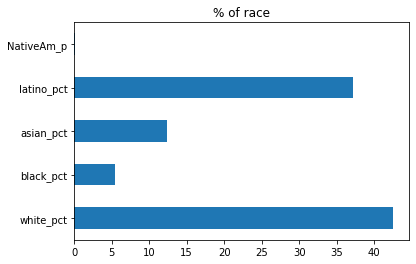

In [35]:
hpi_df_toClean[['white_pct','black_pct','asian_pct','latino_pct','NativeAm_p']].describe()\
                                                        .iloc[1].plot(kind="barh", title = '% of race')


In [24]:
hospitals_df.describe()

,OBJECTID,COUNTY_CODE,TOTAL_NUMBER_BEDS,LONGITUDE,LATITUDE
count,545.000000,542.000000,542.000000,542.000000,542.000000
mean,286.086239,57.745387,180.114391,-119.556287,35.781424
std,157.796389,27.180062,174.991729,2.010088,2.231501
min,4.000000,1.000000,0.000000,-124.195140,32.616690
25%,150.000000,37.000000,60.000000,-121.573628,33.931117
50%,286.000000,59.000000,123.000000,-118.881520,34.534353
75%,422.000000,75.000000,242.000000,-117.968888,37.746623
max,562.000000,115.000000,1388.000000,-114.595600,41.772780


In [31]:
hospitals_df.groupby('COUNTY_NAME')['OBJECTID'].count().sort_values(ascending = False).head(5)

COUNTY_NAME
Los Angeles       129
Orange             43
San Diego          34
San Bernardino     27
Riverside          25
Name: OBJECTID, dtype: int64

hospitals_df.TOTAL_NUMBER_BEDS.sum()

## 8. Analysis

The goal of our analysis is too find optimal locations for new hospitals in areas that dont have an existing hospital in a 20 mile radius from their location. In addition we also attempt to maximize the populations the new hospitals built will cover.

The following steps are used to perform the analysis:

1. Create buffers around all hospital locations in hospital_layer 

2. Find overlay of area not covered by the buffers among all census tracts 

3. Finding percentage of healthcare covered areas in each census tract, clipped or not
4. Use find_centroids to locate centroids in each clipped census tract to serve as demand points
5. Use Geoencoding to retrive all potential locations to build new hospitals in California and use this data to define candidate points from existing state building locations
6. Use spatial join on candidate points and clipped buffer to find all potention locations in the clipper_buffer layer 
7. Update weights of input factors with population data in each census tract
8. Run solve_location_allocation algorithm with maximum attendance problem
9. Put new potential locations layer and uncovered healthcare areas on a map
  

### Hospital and County Analysis

In [111]:
map1 = gis.map('California')
map1.add_layer(hpi)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [112]:
map1.add_layer(hospital_layrer)

## Creating buffers around all hospitals locations 

We create a 20 mile buffer around each hospital location in california. We dissolve all the buffers that intersect with each other. The layer is created to find all the locations in the census tract that is not covered by the hospital buffers. We chose a radius of 20 mile as it is the best reasonable distance to an acute care hospital. A 20 mile trip on average takes around 30-35 minutes


In [9]:
hospital_loc_buffers = use_proximity.create_buffers(hospital_layrer, 
                                                    distances=[20], 
                                                    units = 'Miles', 
                                                    dissolve_type = 'Dissolve')

In [114]:
map2 = gis.map('California')
map2.add_layer(hospital_loc_buffers)
map2

MapView(layout=Layout(height='400px', width='100%'))

## Using overlay_layers to get the uncovered trcats 

We use overlay_layers between the layer HPI whcih contains all the census tracts and the layer hospital_loc_buffers which contains the 20 mile buffers create using the hospiatl layer. We erase all the area that doesnt overlay between the two layers. The resulting layer, cliped_buffer, contains area in the tracts that have some or all of its area uncovered by the hospital buffers 



In [10]:
cliped_buffer = overlay_layers(hpi,
                               hospital_loc_buffers,
                               overlay_type = 'Erase')
map3 = gis.map('California')

map3.add_layer(cliped_buffer)
map3

MapView(layout=Layout(height='400px', width='100%'))

## Get SEDF for the clipped buffer 

We get a SEDF of the clipped buffer to perfrom more analysis on tracts that have some or all of its area uncovered by the buffers 



In [11]:
cliped_buffer_query = cliped_buffer.query() 
buffer_df = cliped_buffer_query.sdf
buffer_df = buffer_df[buffer_df['pop2010'] != 0]
print(buffer_df.shape)
buffer_df.head()

(217, 112)


,AnalysisArea,CENSUSAREA,COUNTY,CensusTrac,City,County_FIP,County_Nam,GEO_ID,LEB,LEB_pctile,...,treecano_1,treecanopy,twoparen_1,twoparents,uncrowded,uncrowded_,version,voting,voting_pct,white_pct
0,373.901094,683.821,039,06039000102,,6039,Madera,1400000US06039000102,75.949524,8.250994,...,98.562813,45.198017,95.919415,95.259939,95.1,54.638778,Wed13Dec17,81.818538,91.210060,77.005608
1,18.859323,276.180,039,06039000109,,6039,Madera,1400000US06039000109,75.097398,5.325292,...,90.825099,17.227172,64.224304,82.338308,97.0,67.804440,Wed13Dec17,82.163643,92.031310,83.930131
2,0.405764,247.827,039,06039000400,,6039,Madera,1400000US06039000400,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Wed13Dec17,0.000000,0.000000,32.620744
3,15.481560,116.049,041,06041132200,,6041,Marin,1400000US06041132200,84.518073,85.859104,...,99.268574,54.362001,4.298730,52.100840,95.8,58.745028,Wed13Dec17,88.110873,99.563711,84.560990
4,0.043064,174.199,043,06043000101,,6043,Mariposa,1400000US06043000101,83.569937,78.159887,...,97.202618,35.229331,11.843963,61.148198,98.0,76.504555,Wed13Dec17,82.988879,93.571154,83.203125


In [12]:
## Get SEDF of all our tracts 
hpi_query = hpi.query(out_sr = 3395)
hpi_df = hpi_query.sdf
hpi_df = hpi_df[hpi_df['pop2010'] != 0] # Remove all tracts with 0 population
hpi_df.shape

(8024, 110)

In [13]:
## Find area of both the SEDF's
hpi_df['total_area'] = hpi_df['SHAPE'].apply(lambda x: x.area)
buffer_df['total_area'] = buffer_df['SHAPE'].apply(lambda x: x.area)

In [14]:
## Get percetage area covered by 
def get_area(row):
    secondary_dic = buffer_df[['CensusTrac','total_area']].set_index('CensusTrac').to_dict()
    secondary_dic = secondary_dic['total_area']
    if row['CensusTrac'] in secondary_dic.keys():
        val_1 = secondary_dic[row['CensusTrac']]
        val_2 = row['total_area']
        if val_1 < 0:
            val_1= -1*val_1
        if val_1 > val_2:
            return 0
        else:
            return np.round(1 - (val_1/val_2), 2)
    return 1
hpi_df['area_covered'] = hpi_df.apply(get_area, axis = 1)    

## Dividing Tracts by area covered 

To do the further anlysis we divide our tracts by the percentage of area covered. We take one subset of the dataset that has all the tracts that have over 80% area covered by a hospital tracts and the other is with all tracts with under 80% area

In [15]:
hpi_over_80 = hpi_df[hpi_df['area_covered'] >= .8]
hpi_under_80 = hpi_df[hpi_df['area_covered'] < .8]

numerical_column =  [
 'abovepover',
 'economic_p',
 'education_',
 'employed',
     'healthca_1']
hpi_over_80_ = hpi_over_80.describe()[numerical_column]
hpi_under_80_ = hpi_under_80.describe()[numerical_column]

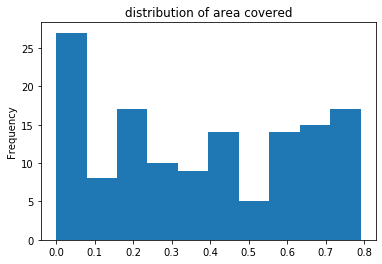

In [105]:
hpi_under_80['area_covered'].plot(kind = 'hist', title = 'distribution of area covered')

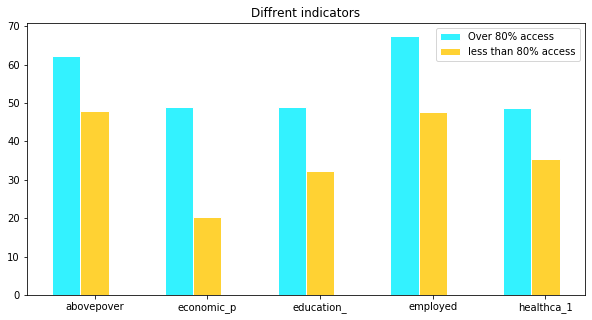

In [93]:
mean_over_80 = hpi_over_80_.iloc[1]
mean_under_80 = hpi_under_80_.iloc[1]
plt.figure(figsize=(10,5)) 



barWidth = 0.25
 
# set height of bar
bars1 = list(mean_over_80.values)
bars2 = list(mean_under_80.values)
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#33F2FF', width=barWidth, edgecolor='white', label='Over 80% access')
plt.bar(r2, bars2, color='#FFD233', width=barWidth, edgecolor='white', label='less than 80% access')
 
# Add xticks on the middle of the group bars
#plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], mean_over_80.index)
 
# Create legend & Show graphic
plt.title('Diffrent indicators')
plt.savefig('indicators.png')
plt.legend()
plt.show()



In [104]:
print('Top 10 ')
hpi_5 = hpi_under_80.sort_values(by = 'pop2010', ascending = False).head(10)
map10  = gis.map('california')
hpi_5.spatial.plot(map_widget = map10)
map10

Census tract with less than 80% area covered sorrted by population


MapView(layout=Layout(height='400px', width='100%'))

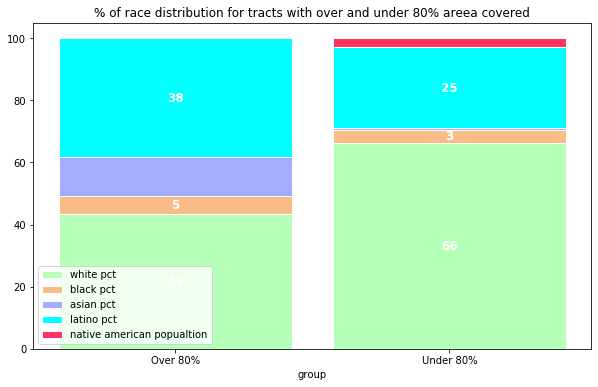

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
plt.figure(figsize=(10,6)) 

r = [0,1]
raw_data = {'white_pct': [42.5, 57.1], 'black_pct': [5.4, 3.4],'asian_pct': [12.4, 0.7],'latino_pct': [37.2, 22.3], 'NativeAm_p':[.1, 2.5] }
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['white_pct'], df['black_pct'], df['asian_pct'],df['latino_pct'],df['NativeAm_p'] )]
white_pct = [i / j * 100 for i,j in zip(df['white_pct'], totals)]
black_pct = [i / j * 100 for i,j in zip(df['black_pct'], totals)]
asian_pct = [i / j * 100 for i,j in zip(df['asian_pct'], totals)]
latino_pct = [i / j * 100 for i,j in zip(df['latino_pct'], totals)]
NativeAm_p = [i / j * 100 for i,j in zip(df['NativeAm_p'], totals)]

 
# plot
barWidth = 0.85
names = ('Over 80%','Under 80%')
# Create green Bars
ax1 = plt.bar(r, white_pct, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'white pct')
# Create orange Bars
ax2 = plt.bar(r, black_pct, bottom=white_pct, color='#f9bc86', edgecolor='white', width=barWidth,label = 'black pct' )
# Create blue Bars
ax3 = plt.bar(r, asian_pct, bottom=[i+j for i,j in zip(white_pct, black_pct)], color='#a3acff', edgecolor='white', width=barWidth, label = 'asian pct')

ax4 = plt.bar(r, latino_pct, bottom=[i+j+k for i,j,k in zip(white_pct, black_pct,asian_pct)], color='#00FFFF', edgecolor='white', width=barWidth, label = 'latino pct')

ax5 = plt.bar(r, NativeAm_p, bottom=[i+j+k+l for i,j,k,l in zip(white_pct, black_pct,asian_pct,latino_pct)], color='#FF3360', edgecolor='white', width=barWidth,label = 'native american popualtion' )
plt.legend(loc="best")

for r1, r2, r3, r4, r5 in zip(ax1, ax2, ax3, ax4,ax5):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    h5 = r5.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2+h3+h4 / 2., "%d" % h4, ha="center", va="center", color="white", fontsize=12, fontweight="bold")



plt.savefig('race_analysis.png')

# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
plt.title('% of race distribution for tracts with over and under 80% areea covered')
plt.show()


### Analysis Based on Income and Race

In [16]:
population_layer  = gis.content.get('80bc98d1d9d44e75a54253c0ae885a31')
#heat_map_pop = WebMap(population_layer)
heat_map_pop = MapView(gis=gis, item=population_layer)
heat_map_pop.legend = True
heat_map_pop

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [17]:
area_covered_layer = gis.content.get('cb45db4b6adf4dedba91151487ddd775')
area_covered_layer_map =  MapView(gis=gis, item=area_covered_layer)
area_covered_layer_map

MapView(layout=Layout(height='400px', width='100%'))

### Locating Tract Centroids

These centroids for each census tract are used as demand points. We use find_centroids on the clipped buffer layer and save it as a feature layer.

In [19]:
# all new optimal locations

#creating demand points
buffer_lyr = gis.content.get('e91ad4449b904301b4541e80672b07d1')
buffer_lyr = buffer_lyr.layers[0]


centroid = find_centroids(buffer_lyr,
                          point_location=True,
                         output_name='centroids_dsc170_2')

In [20]:
centroid

<Item title:"centroids_dsc170_2" type:Feature Layer Collection owner:jeq004_ucsd5>

### Geocoding building addresses

We conduct minor cleaning on the strings of each location, then geocode each address into spatial coordinates. Then we create Point features from each x and y coordinate.

In [30]:
bldgs = gis.content.get('8d4e82708ff74cc694490550360a6d76')

Update: uploading the csv as a hosted feature layer takes care of the geocoding for us. After pulling it from ArcGIS, it already had the spatial coordinates of each building.

In [66]:
#bldgs['Location'] = bldgs['Location'].str.replace('\n', ', ', 1)
#bldgs['Location'] = bldgs['Location'].str.replace('\n', '')

#def geo(row):
    #return geocode(row['Location'])[0]['location']
#bldgs['point'] = bldgs.apply(lambda x: geo(x), axis=1)
#bldgs['POINT_X'] = bldgs.apply(lambda a: a['point']['x'], axis=1)
#bldgs['POINT_Y'] = bldgs.apply(lambda a: a['point']['y'], axis=1)

In [36]:
sdf = bldgs.layers[0].query().sdf
sdf = sdf.replace(np.nan, '', regex=True)
sdf

,Address_1,City,Department,Department_Name,ENERGY_STAR_Score,Electricity_Use___Generated_fro,Electricity_Use___Grid_Purchase,Green_Power___Onsite_and_Offsit,LEED_Certified,Location,...,Propane_Use__kBtu_,Property_GFA___EPA_Calculated__,Property_Id,Property_Name,SHAPE,Site_Energy_Use__kBtu_,State_Province,Water_Use__All_Water_Sources___,Year_Built,Year_Ending
0,Unknown,Camino,CAL TRANS,California Department of Transportation,,,,,,"Unknown\nCamino, California 95709\n",...,,984,3928558,Camino S/S,"{""x"": -13432488.808, ""y"": 4684261.454000004, ""...",,California,,1997,2014-12-31
1,1.9 mi E of Alpine County Line,Kirkwood,CAL TRANS,California Department of Transportation,,,,,,"1.9 mi E of Alpine County Line\nKirkwood, Cali...",...,,24043,3928559,Caples Lake Maint,"{""x"": -10063992.1861, ""y"": 4661781.482299998, ...",,California,82.1,1975,2014-12-31
2,Carquinez Toll Plaza,Vallejo,CAL TRANS,California Department of Transportation,,37203,920518,37203,,"Carquinez Toll Plaza\nVallejo, California 94560\n",...,,,3928560,Carquinez Toll Plaza Maint,"{""x"": -13609358.781, ""y"": 4593696.494000003, ""...",3.52662e+06,California,1471.5,1957,2014-12-31
3,Boreal Ridge Rd && Pacific Crest Trailway,Soda Springs,CAL TRANS,California Department of Transportation,,,4364.7,0,,Boreal Ridge Rd &amp;&amp; Pacific Crest Trail...,...,,4000,3928561,Castle Peak S/S,"{""x"": -12423579.1122, ""y"": 5259557.4580999985,...",14892.4,California,,1965,2014-12-31
4,3 mi E of SR39 Jct,Cedar Springs,CAL TRANS,California Department of Transportation,,,,,,"3 mi E of SR39 Jct\nCedar Springs, California ...",...,,3504,3928565,Cedar Springs S/S,"{""x"": -9523514.9076, ""y"": 5345858.924000002, ""...",,California,,1942,2014-12-31
5,Rt 2S 7 mi NE of La Canda,Chilao,CAL TRANS,California Department of Transportation,,15880.2,33459.3,15880.2,,"Rt 2S 7 mi NE of La Canda\nChilao, California ...",...,,17208,3928566,Chilao Maint,"{""x"": -9366120.2795, ""y"": 4692405.18, ""spatial...",168346,California,140.8,1952,2014-12-31
6,"Cisco Grove Exit, SE Quad",Soda Springs,CAL TRANS,California Department of Transportation,,,32544.7,0,,"Cisco Grove Exit, SE Quad\nSoda Springs, Calif...",...,,3200,3928568,Cisco S/S,"{""x"": -12423579.1122, ""y"": 5259557.4580999985,...",111042,California,,1964,2014-12-31
7,15 mi W of Wrightwood,Dawson,CAL TRANS,California Department of Transportation,,,,,,"15 mi W of Wrightwood\nDawson, California 91702\n",...,,2400,3928569,Dawson Summit S/S,"{""x"": -9400533.5869, ""y"": 3733626.0420999974, ...",,California,,1962,2014-12-31
8,1.2 mi W of SR36 Jct,Millcreek,CAL TRANS,California Department of Transportation,,,,,,"1.2 mi W of SR36 Jct\nMillcreek, California 99...",...,,4080,3928570,Deer Creek S/S,"{""x"": -13605510.4662, ""y"": 6083130.797600001, ...",,California,,1961,2014-12-31
9,3.2 W of Trinity Co Line,Fortuna,CAL TRANS,California Department of Transportation,,,,,,"3.2 W of Trinity Co Line\nFortuna, California ...",...,,0,3928572,Dinsmore S/S,"{""x"": -13820931.491999999, ""y"": 4953161.856200...",,California,,1900,2014-12-31


In [37]:
buf_sdf = buffer_lyr.query(out_sr = 4326).sdf

In [38]:
bldgs_lyr = gis.content.get('fe3e08cb1d0b47878e2cb235af5f0d2e').layers[0]
output = bldgs_lyr.query(out_sr = 4326)
output.sdf.head()

,FID,Property_I,SHAPE
0,1,1386630,"{""x"": -122.46384075186113, ""y"": 38.23536554201..."
1,2,1237691,"{""x"": -120.93816235065513, ""y"": 38.35728288969..."
2,3,1386616,"{""x"": -121.42499622201382, ""y"": 40.67799477130..."
3,4,1386604,"{""x"": -118.13391025549647, ""y"": 33.97891910987..."
4,5,3928639,"{""x"": -118.60623788173027, ""y"": 34.44099759484..."


### Saving map to ArcGIS Online

Saving the map allows us to access from the ArcGIS online portal easier as well as export it for presentations.

In [39]:
map6 = gis.map('California')
output.sdf.spatial.join(buf_sdf).spatial.plot(map_widget = map6
               )
map6.add_layer(buffer_lyr)
map6

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
webmap_properties6 = {'title':'Clipped buffer zone and demand points',
                    'snippet': 'Jupyter notebook widget saved as a web map',
                    'tags':['automation', 'python']}

webmap_item6 = map6.save(webmap_properties6)
webmap_item6

### Performing spatial join on buildings and clipped tracts

This operation allows us to find the candidate facilities, which are potential hospital locations within the clipped buffer tracts.

In [40]:
candpoints = output.sdf.spatial.join(buf_sdf)
#candpoints_lyr = candpoints.spatial.to_featurelayer(title ='candpoints_lyr', gis=gis, tags="fgsga")

In [41]:
candpoints_lyr = gis.content.get('81a42c1d94ef4c6b925435926433bae8')

candidate_facilities = candpoints_lyr.layers[0].query()
candidate_facilities

<FeatureSet> 157 features

### Defining inputs and updating weight with population

Each demand point has its attributed updated with the population factor, so that census tracts with more population attracts more weight for a new facility to be built near them.

In [42]:
object_id_count = 0

for f in candidate_facilities:
    object_id_count+=1
    f.attributes.update({"FacilityType":0})

In [43]:
demand_points = centroid.layers[0].query()
demand_points

<FeatureSet> 222 features

In [44]:
for f in demand_points:
    tmp = f.get_value("pop2010")
    f.attributes.update({"Weight":tmp})

In [45]:

for f in candidate_facilities:
    f.attributes['OBJECTID'] = f.attributes.pop('FID')
    f.attributes['NAME'] = f.attributes.pop('Property_I')

### Solve_location_allocation Algorithm

Maximize attendance means we are trying to accommodate the most people to each facility. We try to locate 15 facilities based on a distance impedance of 20 miles.

In [62]:
result1 = network.analysis.solve_location_allocation(   problem_type='Maximize Attendance',
                                                        travel_direction='Demand to Facility',
                                                        number_of_facilities_to_find='15',
                                                        measurement_transformation_model="Linear",
                                                        measurement_transformation_factor=2,
                                                        demand_points=demand_points,
                                                        facilities=candidate_facilities,
                                                        measurement_units='Miles',
                                                        default_measurement_cutoff=20,
                                                        distance_impedance = 'Miles',
                                                        impedance = 'Miles'
                                                         
                                                    )
print('Analysis succeeded? {}'.format(result1.solve_succeeded))

Location "9804.01" in "Demand Points" is unlocated.
Location "036.12" in "Demand Points" is unlocated.
Location "09801" in "Demand Points" is unlocated.


Analysis succeeded? True


### Analyzing and visualizing output

In [63]:
demand_df = result1.output_demand_points.sdf
lines_df = result1.output_allocation_lines.sdf

    # Extract the allocated demand points (pop) data.
demand_allocated_df = demand_df[demand_df['DemandOID'].isin(lines_df['DemandOID'])]

    # Extract the un-allocated demand points (pop) data.
demand_not_allocated_df = demand_df[~demand_df['DemandOID'].isin(lines_df['DemandOID'])]

    # Extract the chosen facilities (candidate sites) data.
facilities_df = result1.output_facilities.sdf[['Name', 'FacilityType', 
                                                 'Weight','DemandCount', 'DemandWeight', 'SHAPE']]
facilities_chosen_df = facilities_df[facilities_df['FacilityType'] == 3]


In [64]:
facilities_chosen_df

,Name,FacilityType,Weight,DemandCount,DemandWeight,SHAPE
0,1386616,3,1,2,1.368401,"{""x"": -121.42499622199995, ""y"": 40.67799477100..."
2,1383545,3,1,3,1.935272,"{""x"": -123.71755082099997, ""y"": 39.13069607200..."
15,3940100,3,1,4,3.003930,"{""x"": -121.38118649999996, ""y"": 36.46124100000..."
24,1386903,3,1,4,2.233030,"{""x"": -116.68362717799994, ""y"": 33.17013991700..."
52,3939994,3,1,2,1.047004,"{""x"": -123.42755319999998, ""y"": 38.70135219100..."
74,3940207,3,1,3,1.090663,"{""x"": -120.27745239999996, ""y"": 38.30993990000..."
86,3939952,3,1,2,1.428846,"{""x"": -124.13372415599997, ""y"": 40.23762108400..."
95,1386883,3,1,4,1.992258,"{""x"": -119.68958692199999, ""y"": 37.26405542200..."
111,1386751,3,1,4,1.289792,"{""x"": -120.66066999999998, ""y"": 39.30150000000..."
115,1386847,3,1,5,2.076647,"{""x"": -118.85356327399995, ""y"": 34.79651425600..."


In [65]:
map7 = gis.map('California')
map7.add_layer(buffer_lyr)
facilities_chosen_df.spatial.plot(map_widget = map7)
#demand_df.spatial.plot(map_widget = map7)
#lines_df.spatial.plot(map_widget=map7)
map7

MapView(layout=Layout(height='400px', width='100%'))

In [67]:
webmap_properties9 = {'title':'15 new facilities on clipped buffer',
                    'snippet': 'Jupyter notebook widget saved as a web map',
                    'tags':['automation', 'python']}

webmap_item9 = map7.save(webmap_properties9)
webmap_item9

<Item title:"15 new facilities on clipped buffer" type:Web Map owner:jeq004_ucsd5>

## 9. Summary & Results

In the end, we were able to successfully locate 9 new facilities. Even though we wanted to find 15 facilities, this was a good result as the 9 points we did find are optimal in its coverage.

## 10. Discussion

Our findings, in regards to the literature and background we found part 3, confirms many of the claims regarding inadequate access to healthcare between disadvantaged groups. 

In our HPI dataset, we could have prioritized the 9 facilities we located based on socio-economic indicators. Instead of just looking at socio-economic factors based on all tracts, we can look at which of these 9 facilities would serve residents that need it the most. This would be a strong reason that a certain facility should be a priority to build first.

## 11. Conclusion & Future Work

Looking at the output of our location allocation algorithm, there can definitely be improvements. We wanted to find 15 new facilities, but it was only able to find 9. Given, it was due to redundant coverage. But other things we can try is to change the type of problem from "Maximize Attendance" to another type of problem. Or, we can alter our input candidate facilities and demand points. Other factors such as how distance is calculated in the algorithm, or the population as a weight, can be changed to see if we locate more facilities that provide wider coverage. Furthermore, we can plug those new facilities into our hospitals layer and overlay it with our census tracts, to see the amount of coverage that has increased, and perhaps calculate a statistic on the percent increase.

Another thing we could've done differently at the beginning is change our analysis from distance of 20 minutes to perhaps drive time buffers of 30 minutes. This is because in high population areas, driving time is a much more accurate sense of distance than just the length of a path. Also, instead of using state buildings as our candidate points, we can also try to generate random points inside each census tract polygon to act as candidate points.